# Análise exploratória do Campeonato Brasileiro de Pontos Corridos Série A [2003-2020]
###### *Tem como finalidade exibir algumas análises relacionadas aos campeonatos brasileiros de futebol realizados como forma de pontos ocorridos*

![](https://imagens.ebc.com.br/aw-I_Y2OkUmA5Cdd6ZJmEYb1tko=/1170x700/smart/https://agenciabrasil.ebc.com.br/sites/default/files/thumbnails/image/trofeu_campeonato_brasileiro_serie_a.jpeg?itok=uQmZd0io)


**DataSets**
*   [campeonato-brasileiro-pontos-corridos-2003-2020-periodo.csv](https://github.com/juvenalfonseca/python/blob/master/datasets/campeonato-brasileiro-pontos-corridos-2003-2020-periodo.csv)
*   [campeonato-brasileiro-pontos-corridos-2003-2020-jogos.csv](https://github.com/juvenalfonseca/python/blob/master/datasets/campeonato-brasileiro-pontos-corridos-2003-2020-jogos.csv)


**Referências dos DataSets**
* https://github.com/adaoduque/Brasileirao_Dataset
* https://pt.wikipedia.org/wiki/Campeonato_Brasileiro_de_Futebol_de_2003

## Importando Bibliotecas

In [1]:
import pandas as pd
import warnings as wa
import seaborn as sns
import matplotlib.pyplot as plt


wa.simplefilter( action='ignore', category= FutureWarning)
pd.options.mode.chained_assignment = None

## Configura Gráficos

In [2]:
### configura parametros de tamanho dos gráficos
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 15 
plt.rcParams['axes.titlesize'] = 20

## Base de Dados

In [3]:
### carrega datasets
df_periodo = pd.read_csv("https://github.com/juvenalfonseca/python/blob/master/datasets/campeonato-brasileiro-pontos-corridos-2003-2020-periodo.csv?raw=true", delimiter=";")
df_jogos   = pd.read_csv("https://github.com/juvenalfonseca/python/blob/master/datasets/campeonato-brasileiro-pontos-corridos-2003-2020-jogos.csv?raw=true", delimiter=";")

In [4]:
df_periodo.head()

,Torneio,Inicio,Fim
0,BRA2003,29/03/2003,14/12/2003
1,BRA2004,21/04/2004,19/12/2004
2,BRA2005,11/04/2005,09/12/2005
3,BRA2006,15/04/2006,03/12/2006
4,BRA2007,12/05/2007,02/12/2007


In [5]:
df_jogos.head()

,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor
0,1,29/03/2003,16h00,Sábado,Athlético-PR,Grêmio,Athlético-PR,Arena da Baixada,2,0,PR,RS,PR
1,1,29/03/2003,16h00,Sábado,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ,SP
2,1,30/03/2003,16h00,Domingo,Fortaleza,Bahia,-,Castelão,0,0,CE,BA,-
3,1,30/03/2003,16h00,Domingo,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR,-
4,1,30/03/2003,16h00,Domingo,Vitória,Figueirense,-,Barradão,1,1,ES,SC,-


## Configurações para Análise

In [ ]:
### padroniza caixa dos nomes das variáveis
df_periodo.columns = df_periodo.columns.str.lower()
df_jogos.columns   = df_jogos.columns.str.lower()

In [ ]:
### altera campos de datas de character para date
df_periodo['inicio' ] = pd.to_datetime(df_periodo['inicio'], format="%d/%m/%Y")
df_periodo['fim'    ] = pd.to_datetime(df_periodo['fim'   ], format="%d/%m/%Y")
df_jogos['data'     ] = pd.to_datetime(df_jogos['data'    ], format="%d/%m/%Y")


In [ ]:
### captalizar strings
df_jogos['dia'      ] = df_jogos['dia'      ].str.title()
df_jogos['mandante' ] = df_jogos['mandante' ].str.title()
df_jogos['visitante'] = df_jogos['visitante'].str.title()
df_jogos['vencedor' ] = df_jogos['vencedor' ].str.title()
df_jogos['arena'    ] = df_jogos['arena'    ].apply(lambda x: x.title())

In [ ]:
### junta os datasets e retorna apenas os registros corretos criados na junção
df_periodo['key'] = 1
df_jogos['key'] = 1

df = pd.merge(df_periodo, df_jogos, on ='key').drop("key", 1)
df = df.query('data >= inicio & data <= fim')

In [ ]:
df.head(5)

,torneio,inicio,fim,rodada,data,horário,dia,mandante,visitante,vencedor,arena,mandante placar,visitante placar,estado mandante,estado visitante,estado vencedor
0,BRA2003,2003-03-29,2003-12-14,1,2003-03-29,16h00,Sábado,Athlético-Pr,Grêmio,Athlético-Pr,Arena Da Baixada,2,0,PR,RS,PR
1,BRA2003,2003-03-29,2003-12-14,1,2003-03-29,16h00,Sábado,Guarani,Vasco,Guarani,Brinco De Ouro,4,2,SP,RJ,SP
2,BRA2003,2003-03-29,2003-12-14,1,2003-03-30,16h00,Domingo,Fortaleza,Bahia,-,Castelão,0,0,CE,BA,-
3,BRA2003,2003-03-29,2003-12-14,1,2003-03-30,16h00,Domingo,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR,-
4,BRA2003,2003-03-29,2003-12-14,1,2003-03-30,16h00,Domingo,Vitória,Figueirense,-,Barradão,1,1,ES,SC,-


## Análise de Correlação


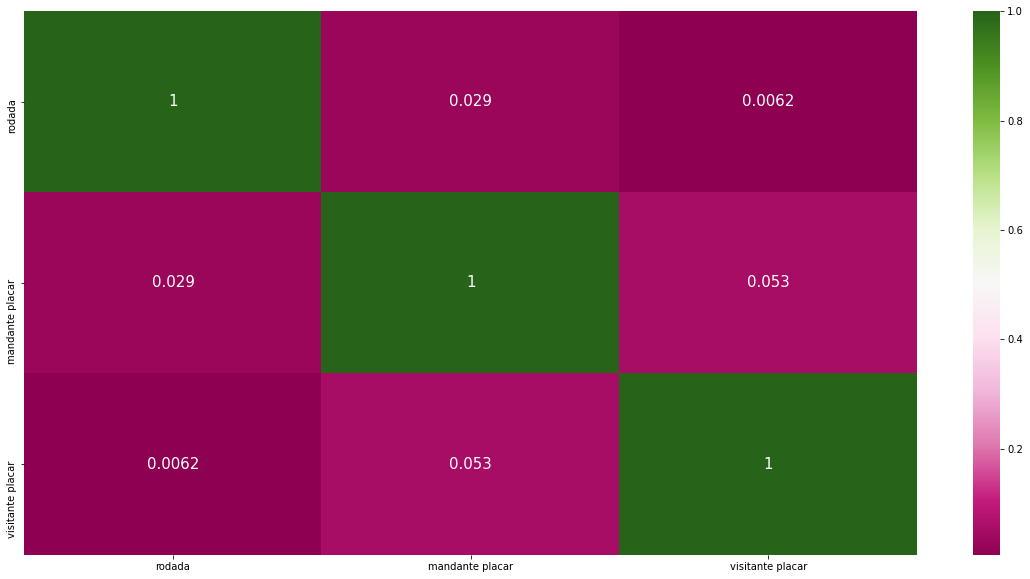

In [ ]:
## Mapa de correlação das variáveis numéricas
sns.heatmap(df.corr(), annot=True, cmap="PiYG")
plt.show()

## Análise de Gols

In [ ]:
### GOLS POR EDIÇÃO
gols_mandante = df[['torneio', 'mandante placar']].groupby('torneio').agg(lambda x: sum(x)).reset_index()
gols_mandante.rename(columns = {"mandante placar": "gols_mandante"}, inplace=True)

gols_visitante = df.groupby('torneio')['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_visitante.rename(columns = {"visitante placar": "gols_visitante"}, inplace=True)

gols_edicao = pd.merge(gols_mandante, gols_visitante, on="torneio")

gols_edicao['gols_total'          ] = gols_edicao['gols_mandante'] + gols_edicao['gols_visitante']
gols_edicao['gols_mandante_perc'  ] = (gols_edicao['gols_mandante' ]/gols_edicao['gols_total'])*100
gols_edicao['gols_visitantes_perc'] = (gols_edicao['gols_visitante']/gols_edicao['gols_total'])*100

gols_edicao

,torneio,gols_mandante,gols_visitante,gols_total,gols_mandante_perc,gols_visitantes_perc
0,BRA2003,982,610,1592,61.683417,38.316583
1,BRA2004,947,587,1534,61.734029,38.265971
2,BRA2005,835,616,1451,57.546520,42.453480
3,BRA2006,604,426,1030,58.640777,41.359223
4,BRA2007,638,414,1052,60.646388,39.353612
5,BRA2008,654,376,1030,63.495146,36.504854
6,BRA2009,659,435,1094,60.237660,39.762340
7,BRA2010,581,397,978,59.406953,40.593047
8,BRA2011,610,407,1017,59.980334,40.019666
9,BRA2012,559,380,939,59.531416,40.468584


In [ ]:
### GOLS POR EDIÇÃO COMPARATIVO
df1 = gols_edicao[['torneio','gols_mandante' ]]
df2 = gols_edicao[['torneio','gols_visitante']]
df3 = gols_edicao[['torneio','gols_total'    ]]

df1.rename(columns = {'gols_mandante' : 'gols' }, inplace=True)
df2.rename(columns = {'gols_visitante': 'gols' }, inplace=True)
df3.rename(columns = {'gols_total'    : 'gols' }, inplace=True)

df1['tipo_gols'] = 'gols_mandante'
df2['tipo_gols'] = 'gols_visitante'
df3['tipo_gols'] = 'gols_total'

df4 = pd.concat([df1, df2, df3]).reset_index(drop=True)

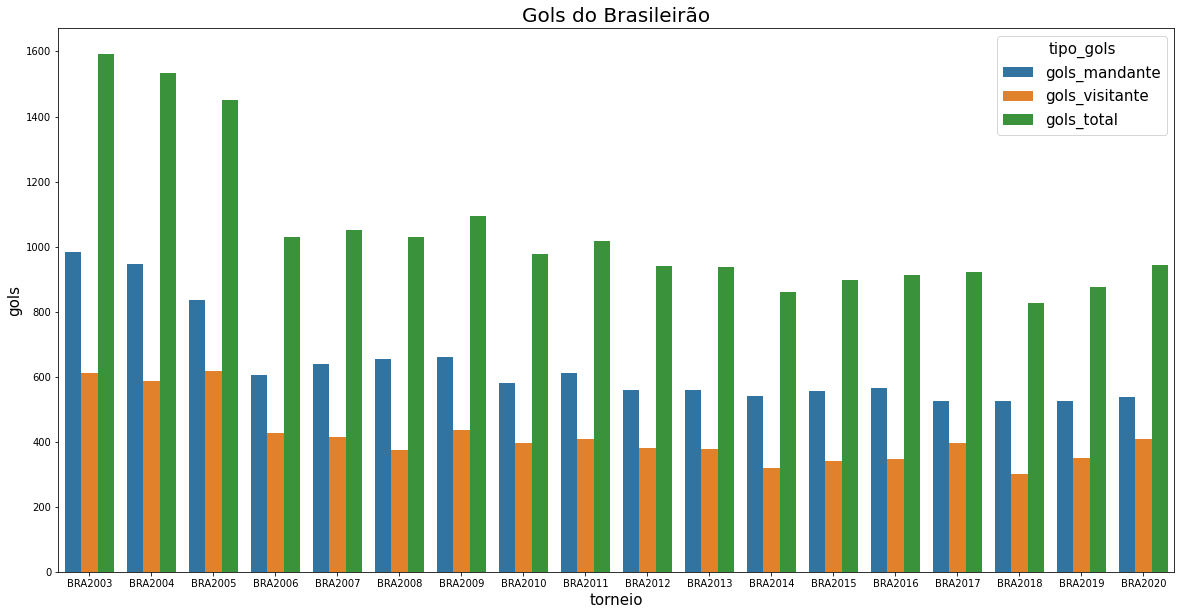

In [ ]:
### GRÁFICO GOLS POR EDIÇÃO COMPARATIVO
sns.barplot(x="torneio", y="gols", hue="tipo_gols", data=df4)
plt.title('Gols do Brasileirão')
plt.show()

In [ ]:
### TOP 10 CLUBE GOLS MARCADOS
gols_mandante_time  = df.groupby('mandante' )['mandante placar' ].sum().sort_values(ascending=False).reset_index()
gols_visitante_time = df.groupby('visitante')['visitante placar'].sum().sort_values(ascending=False).reset_index()

gols_mandante_time.rename(columns  = {"mandante" : "time", 'mandante placar' : 'gols marcados' }, inplace=True)
gols_visitante_time.rename(columns = {"visitante": "time", 'visitante placar': 'gols marcados' }, inplace=True)

gols_time = pd.concat([gols_mandante_time, gols_visitante_time])

gols_marcados_time = gols_time.groupby('time')['gols marcados'].sum().sort_values(ascending=False).reset_index()
gols_marcados_time.head(10)

,time,gols marcados
0,Santos,1060
1,São Paulo,1037
2,Flamengo,984
3,Cruzeiro,978
4,Atlético-Mg,967
5,Fluminense,946
6,Grêmio,912
7,Internacional,893
8,Athlético-Pr,892
9,Palmeiras,889


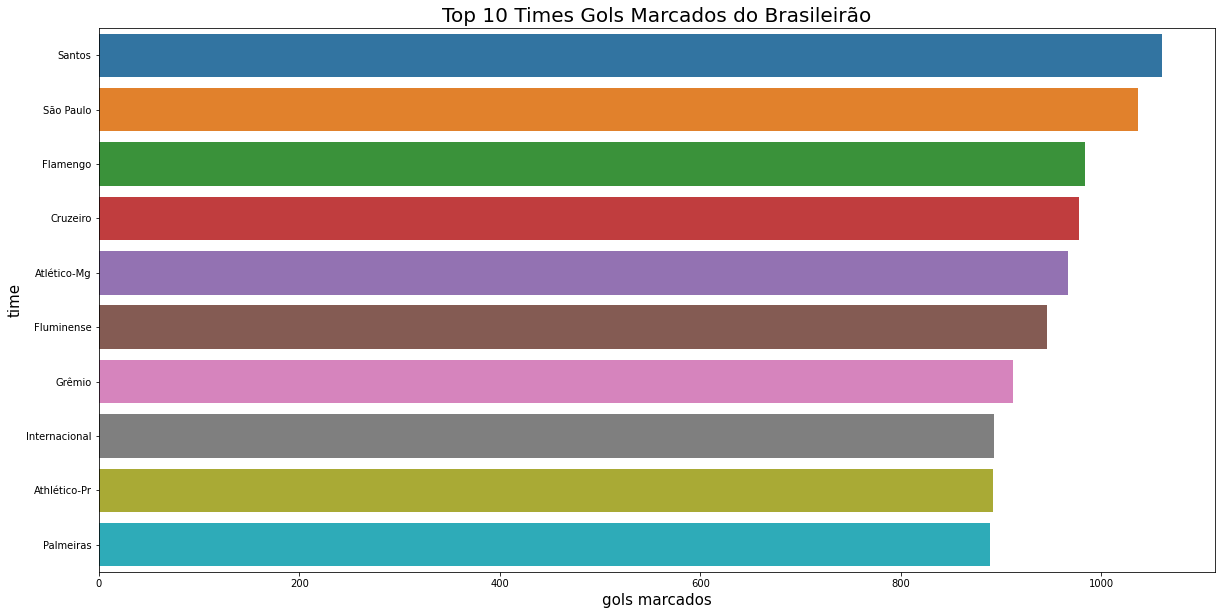

In [ ]:
### GRÁFICO TOP 10 CLUBE GOLS MARCADOS
sns.barplot(x="gols marcados", y="time", data=gols_marcados_time.head(10))
plt.title('Top 10 Times Gols Marcados do Brasileirão')
plt.show()

In [ ]:
### TOP 10 CLUBE GOLS SOFRIDOS
gols_mandante_time  = df.groupby('visitante')['mandante placar' ].sum().sort_values(ascending=False).reset_index()
gols_visitante_time = df.groupby('mandante' )['visitante placar'].sum().sort_values(ascending=False).reset_index()

gols_mandante_time.rename(columns  = {"visitante": "time", 'mandante placar' : 'gols sofridos' }, inplace=True)
gols_visitante_time.rename(columns = {"mandante" : "time", 'visitante placar': 'gols sofridos' }, inplace=True)

gols_time = pd.concat([gols_mandante_time, gols_visitante_time])

gols_sofridos_time = gols_time.groupby('time')['gols sofridos'].sum().sort_values(ascending=False).reset_index()
gols_sofridos_time.head(10)

,time,gols sofridos
0,Fluminense,906
1,Atlético-Mg,875
2,Flamengo,845
3,Santos,837
4,Vasco,832
5,Athlético-Pr,829
6,Cruzeiro,818
7,Botafogo-Rj,801
8,São Paulo,760
9,Palmeiras,737


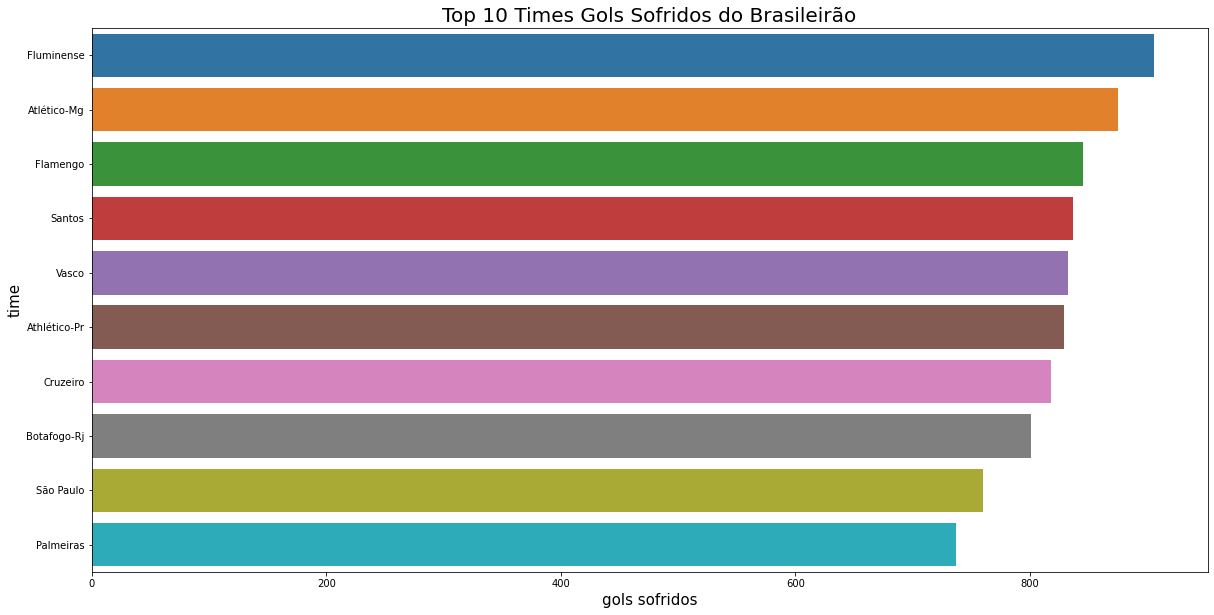

In [ ]:
### GRÁFICO TOP 10 CLUBE GOLS SOFRIDOS
sns.barplot(x="gols sofridos", y="time", data=gols_sofridos_time.head(10))
plt.title('Top 10 Times Gols Sofridos do Brasileirão')
plt.show()

## Análise por Ataque


In [ ]:
### Melhores ataques por edição
df['clube']                  = df['mandante']
gols_clubes_mandantes        = df.groupby(['torneio','clube'])['mandante placar'].sum().sort_values(ascending=False).reset_index()

df['clube']                  = df['visitante']
gols_clubes_visitantes       = df.groupby(['torneio','clube'])['visitante placar'].sum().sort_values(ascending=False).reset_index()

gols_clubes_mandantes.rename(columns  = {"mandante placar" : "gols_mandante" }, inplace=True)
gols_clubes_visitantes.rename(columns = {"visitante placar": "gols_visitante"}, inplace=True)

gols_clubes               = pd.merge(gols_clubes_mandantes, gols_clubes_visitantes,  on=["torneio","clube"])
gols_clubes['gols_total'] = gols_clubes['gols_mandante'] + gols_clubes['gols_visitante']

ataque_pior   = gols_clubes.groupby('torneio')['gols_total'].min().sort_values(ascending=False).reset_index()
ataque_melhor = gols_clubes.groupby('torneio')['gols_total'].max().sort_values(ascending=False).reset_index()

gols_torneio_ataque_melhor = pd.merge(gols_clubes, ataque_melhor, on=['torneio','gols_total'])[['torneio','clube','gols_total']]
gols_torneio_ataque_pior   = pd.merge(gols_clubes, ataque_pior  , on=['torneio','gols_total'])[['torneio','clube','gols_total']]

gols_torneio_ataque_melhor.rename(columns = {"gols_total": "ataque_melhor"}, inplace=True)
gols_torneio_ataque_pior.rename(columns   = {"gols_total": "ataque_pior"  }, inplace=True)

gols_ataques = pd.merge(gols_torneio_ataque_melhor, gols_torneio_ataque_pior, on="torneio", suffixes=("_melhor","_pior"))
gols_ataques.sort_values(['torneio','clube_melhor'])

,torneio,clube_melhor,ataque_melhor,clube_pior,ataque_pior
2,BRA2003,Cruzeiro,102,Vitória,50
0,BRA2004,Santos,103,Ponte Preta,43
1,BRA2004,Santos,103,Guarani,43
5,BRA2005,Corinthians,87,Brasiliense,49
16,BRA2006,São Paulo,66,São Caetano,37
7,BRA2007,Cruzeiro,74,América-Rn,24
13,BRA2008,Flamengo,67,Ipatinga,37
4,BRA2009,Grêmio,67,Athlético-Pr,42
15,BRA2010,Grêmio,68,Guarani,33
17,BRA2011,Fluminense,60,Athlético-Pr,38


In [ ]:
gols_ataques.head(2)

,torneio,clube_melhor,ataque_melhor,clube_pior,ataque_pior
0,BRA2004,Santos,103,Ponte Preta,43
1,BRA2004,Santos,103,Guarani,43


## Análise de Pontuação

In [ ]:
# Pontuação
pontos_participantes               = df.groupby('torneio')['mandante'].nunique().sort_values(ascending=False).reset_index()
pontos_participantes['pontos_max'] = (pontos_participantes.mandante - 1)*2*3

pontos = df[['torneio', 'mandante', 'visitante', 'mandante placar', 'visitante placar']]

pontos['pontos_mandante' ] = pontos.apply(lambda x: 3 if x['mandante placar'] > x['visitante placar'] else (0 if x['mandante placar'] < x['visitante placar'] else 1), axis=1)
pontos['pontos_visitante'] = pontos.apply(lambda x: 3 if x['mandante placar'] < x['visitante placar'] else (0 if x['mandante placar'] > x['visitante placar'] else 1), axis=1)

pontos_mandantes = pontos.groupby(['torneio','mandante' ])['pontos_mandante' ].sum().sort_values(ascending=False).reset_index()
pontos_visitante = pontos.groupby(['torneio','visitante'])['pontos_visitante'].sum().sort_values(ascending=False).reset_index()

pontos_mandantes.rename(columns = {"mandante": "clube" }, inplace=True)
pontos_visitante.rename(columns = {"visitante": "clube"}, inplace=True)

pontos_total = pd.merge(pontos_mandantes, pontos_visitante, on=['torneio','clube'])
pontos_total['pontos_total'] = pontos_total.pontos_mandante + pontos_total.pontos_visitante

In [ ]:
### maior pontuador de todas as edições
pontos_total[pontos_total['pontos_total'] == pontos_total['pontos_total'].max()]

,torneio,clube,pontos_mandante,pontos_visitante,pontos_total
2,BRA2003,Cruzeiro,56,44,100


In [ ]:
### menor pontuador de todas as edições
pontos_total[pontos_total['pontos_total'] == pontos_total['pontos_total'].min()]

,torneio,clube,pontos_mandante,pontos_visitante,pontos_total
369,BRA2007,América-Rn,9,8,17


## Análise de Resultados

In [ ]:
### Número de vitórias, empates e derrotas das equipes
resultado = pontos[['torneio','mandante','visitante','pontos_mandante','pontos_visitante']]
resultado['resultado_mandante' ] = pontos.apply(lambda x: 'Vitória' if x['pontos_mandante' ] == 3 else ('Derrota' if x['pontos_mandante' ] == 0 else 'Empate'), axis=1)
resultado['resultado_visitante'] = pontos.apply(lambda x: 'Vitória' if x['pontos_visitante'] == 3 else ('Derrota' if x['pontos_visitante'] == 0 else 'Empate'), axis=1)

resultado_mandante = resultado.groupby( ['mandante' ,'resultado_mandante' ])['torneio'].count().reset_index()
resultado_visitante = resultado.groupby(['visitante','resultado_visitante'])['torneio'].count().reset_index()

resultado_mandante.rename(columns  = {"mandante": "clube" , "resultado_mandante" :"resultado", "torneio":"ocorrencia"}, inplace=True)
resultado_visitante.rename(columns = {"visitante": "clube", "resultado_visitante":"resultado", "torneio":"ocorrencia"}, inplace=True)

resultado = pd.concat([resultado_mandante, resultado_visitante])
resultado = resultado.groupby(['clube','resultado'])['ocorrencia'].sum().reset_index()

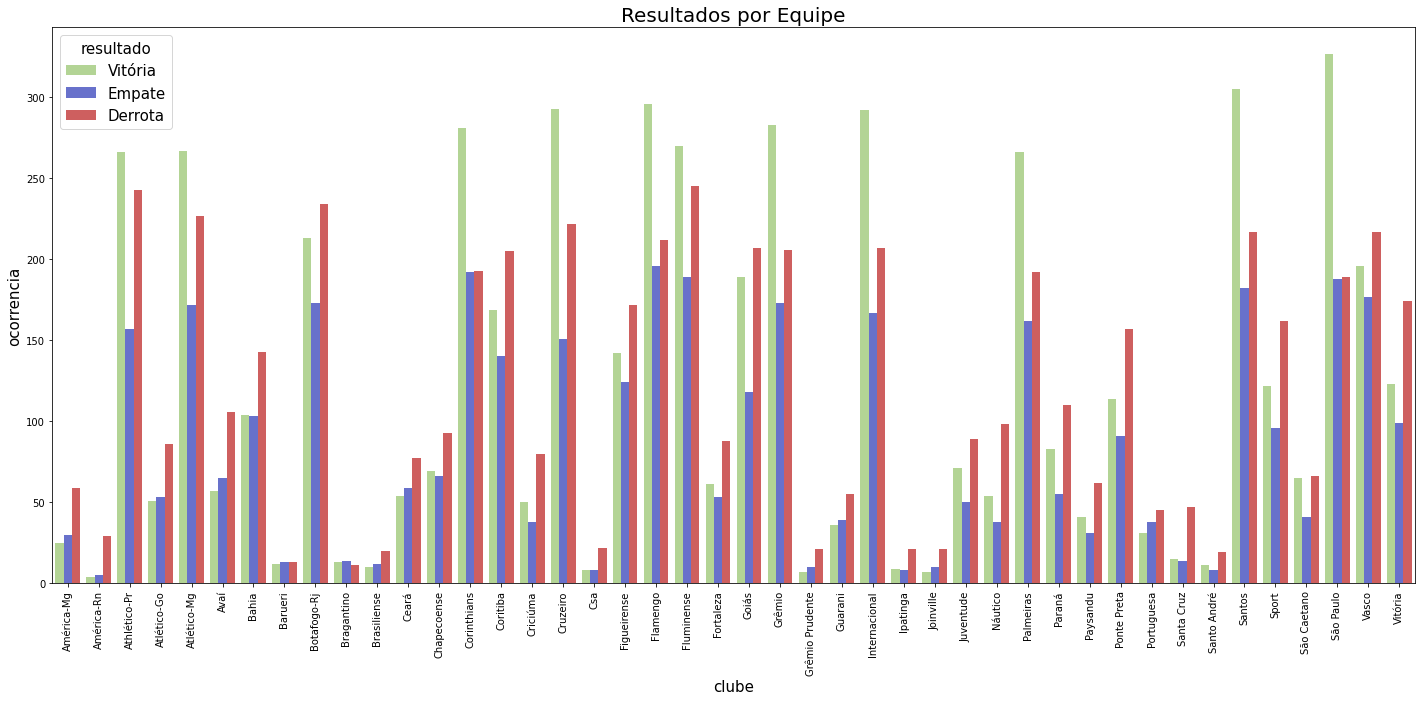

In [ ]:
colors = ["#b2df8a", "#5764db","#e14c4c"]
sns.set_palette(sns.color_palette(colors))

g = sns.barplot(x="clube", y="ocorrencia", hue="resultado", data=resultado, hue_order=['Vitória','Empate','Derrota'])
plt.title('Resultados por Equipe')
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
### Percentual de resultados por equipe
vit = resultado.query("resultado == 'Vitória'")
emp = resultado.query("resultado == 'Empate'" )
der = resultado.query("resultado == 'Derrota'")

vit.rename(columns = {"ocorrencia": "vitorias"}, inplace=True)
emp.rename(columns = {"ocorrencia": "empates" }, inplace=True)
der.rename(columns = {"ocorrencia": "derrotas"}, inplace=True)

vit = vit[['clube','vitorias']]
emp = emp[['clube','empates']]
der = der[['clube','derrotas']]

rm = pd.merge(vit, emp, on='clube')
ca = pd.merge(rm , der, on='clube')
ca['total'] = ca['vitorias'] + ca['empates'] + ca['derrotas']

ca['perc_vitorias'] = (ca.vitorias / ca.total)*100
ca['perc_empates' ] = (ca.empates  / ca.total)*100
ca['perc_derrotas'] = (ca.derrotas / ca.total)*100

ca.head()

,clube,vitorias,empates,derrotas,total,perc_vitorias,perc_empates,perc_derrotas
0,América-Mg,25,30,59,114,21.929825,26.315789,51.754386
1,América-Rn,4,5,29,38,10.526316,13.157895,76.315789
2,Athlético-Pr,266,157,243,666,39.939940,23.573574,36.486486
3,Atlético-Go,51,53,86,190,26.842105,27.894737,45.263158
4,Atlético-Mg,267,172,227,666,40.090090,25.825826,34.084084


In [ ]:
percentual = resultado
perc_total = percentual.groupby(['clube'])['ocorrencia'].sum().reset_index()
percentual = pd.merge(percentual, perc_total, on='clube', suffixes=("","_y") )
percentual.rename(columns = {"ocorrencia_y": "perc"}, inplace=True)
percentual['perc'] = (percentual.ocorrencia / percentual.perc)*100

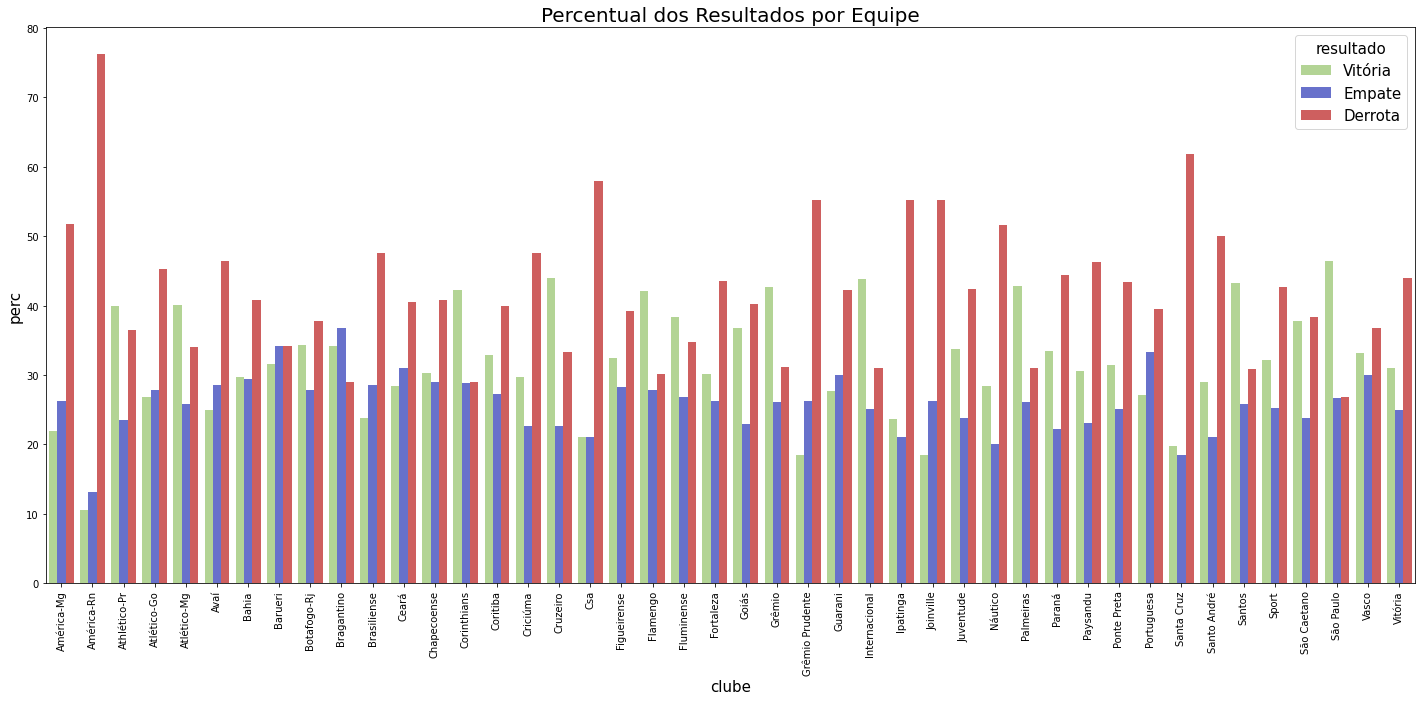

In [ ]:
colors = ["#b2df8a", "#5764db","#e14c4c"]
sns.set_palette(sns.color_palette(colors))

g = sns.barplot(x="clube", y="perc", hue="resultado", data=percentual, hue_order=['Vitória','Empate','Derrota'])

plt.title('Percentual dos Resultados por Equipe')
plt.xticks(rotation=90)
plt.tight_layout()

## Análise de Campeões

In [ ]:
### Campeões
campeoes = pontos_total.groupby('torneio')['pontos_total'].max().reset_index()
campeoes.rename(columns = {"pontos_total": "maior_ponto"}, inplace=True)
campeoes = pd.merge(campeoes, pontos_total, left_on=['torneio','maior_ponto'], right_on=['torneio','pontos_total'])

campeoes = pd.merge(campeoes, pontos_participantes, on='torneio')
campeoes['aproveitamento'] = (campeoes.pontos_total / campeoes.pontos_max)*100
campeoes['ano'] = campeoes['torneio'].str.extract('(\d+)').astype(int)
campeoes

,torneio,maior_ponto,clube,pontos_mandante,pontos_visitante,pontos_total,mandante,pontos_max,aproveitamento,ano
0,BRA2003,100,Cruzeiro,56,44,100,24,138,72.463768,2003
1,BRA2004,89,Santos,56,33,89,24,138,64.492754,2004
2,BRA2005,81,Corinthians,42,39,81,22,126,64.285714,2005
3,BRA2006,78,São Paulo,46,32,78,20,114,68.421053,2006
4,BRA2007,77,São Paulo,42,35,77,20,114,67.543860,2007
5,BRA2008,75,São Paulo,46,29,75,20,114,65.789474,2008
6,BRA2009,67,Flamengo,40,27,67,20,114,58.771930,2009
7,BRA2010,71,Fluminense,41,30,71,20,114,62.280702,2010
8,BRA2011,71,Corinthians,41,30,71,20,114,62.280702,2011
9,BRA2012,77,Fluminense,38,39,77,20,114,67.543860,2012


In [ ]:
### campeões com a maior e menor pontuação
campeoes_pontuacao = campeoes[['torneio', 'clube', 'pontos_total', 'aproveitamento']]
campeoes_pontuacao['maior_ponto'] = campeoes_pontuacao.pontos_total.max()
campeoes_pontuacao['menor_ponto'] = campeoes_pontuacao['pontos_total'].min()
campeoes_pontuacao = campeoes_pontuacao.query('pontos_total == maior_ponto or pontos_total == menor_ponto')
campeoes_pontuacao['observacao'] = campeoes_pontuacao.apply(lambda x: 'Campeão com a maior pontuação' if x['pontos_total'] == x['maior_ponto'] else 'Campeão com a menor pontuação', axis=1)
campeoes_pontuacao = campeoes_pontuacao[['torneio', 'clube', 'pontos_total', 'observacao']]
campeoes_pontuacao

,torneio,clube,pontos_total,observacao
0,BRA2003,Cruzeiro,100,Campeão com a maior pontuação
6,BRA2009,Flamengo,67,Campeão com a menor pontuação


In [ ]:
### campeões com o maior e menor aproveitamento
campeoes_aproveitamento = campeoes[['torneio', 'clube', 'pontos_total', 'aproveitamento']]
campeoes_aproveitamento['maior_aproveitamento'] = campeoes_aproveitamento.aproveitamento.max()
campeoes_aproveitamento['menor_aproveitamento'] = campeoes_aproveitamento['aproveitamento'].min()
campeoes_aproveitamento = campeoes_aproveitamento.query('aproveitamento == maior_aproveitamento or aproveitamento == menor_aproveitamento')
campeoes_aproveitamento['observacao'] = campeoes_aproveitamento.apply(lambda x: 'Campeão com o maior aproveitamento' if x['aproveitamento'] == x['maior_aproveitamento'] else 'Campeão com o menor aproveitamento', axis=1)
campeoes_aproveitamento = campeoes_aproveitamento[['torneio', 'clube', 'aproveitamento', 'observacao']]
campeoes_aproveitamento

,torneio,clube,aproveitamento,observacao
6,BRA2009,Flamengo,58.771930,Campeão com o menor aproveitamento
16,BRA2019,Flamengo,78.947368,Campeão com o maior aproveitamento


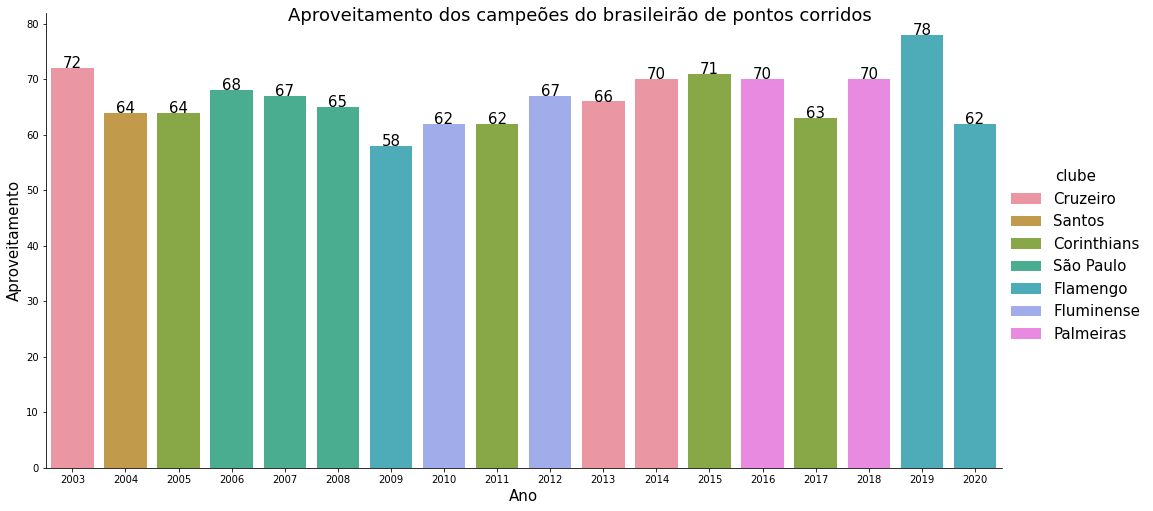

In [ ]:
campeoes['aprov'] = campeoes.aproveitamento.astype(int)

g = sns.catplot(x='ano',y='aprov', data=campeoes, hue='clube', dodge=False, kind='bar', height=7, aspect=2)
g.set_axis_labels('Ano','Aproveitamento')
g.fig.suptitle('Aproveitamento dos campeões do brasileirão de pontos corridos', ha='center', fontsize=18)

for index, row in campeoes.iterrows():
    g.ax.text(row.name, row.aprov, row.aprov, color='black', ha="center")
  